<a href="https://colab.research.google.com/github/Sherin1998/Breast-Cancer-with-Neural-Network/blob/main/breast_cancer_using_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn.datasets
import matplotlib.pyplot  as pyplot
from sklearn.model_selection import train_test_split

In [ ]:
brest_cancer=sklearn.datasets.load_breast_cancer()

In [ ]:
brest_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
cancerdf=pd.DataFrame(brest_cancer['data'],columns=brest_cancer.feature_names)

In [ ]:
cancerdf.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
cancerdf['target']=brest_cancer['target'] #label

In [ ]:
cancerdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
cancerdf['target'].value_counts()      #1 ==> Benign
                                       #0 ==> Malignant cancer

1    357
0    212
Name: target, dtype: int64

In [ ]:
cancerdf.groupby('target').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


mean radius,mean texture,mean perimeter,mean area of malignant cancer are higher than beningn cancer 

In [ ]:
X=cancerdf.drop('target',axis=1)
Y=cancerdf['target']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
#Scale data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_std=scaler.fit_transform(X_train)
x_test_std=scaler.transform(X_test)

In [ ]:
import tensorflow as tf
tf.random.set_seed(3)      
from tensorflow import keras


In [ ]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(X.shape[1],)),keras.layers.Dense(120,activation='relu',kernel_initializer="HeUniform"),keras.layers.Dense(2,activation='sigmoid')])

![picture](/Neural-Network-in-TikZ-252-Arrows.png)

In [ ]:
#compile NN
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Training
history=model.fit(x_train_std,Y_train,validation_split=0.1,epochs=15)

Epoch 1/15
13/13 [==============================] - 0s 14ms/step - loss: 0.4380 - accuracy: 0.7922 - val_loss: 0.2011 - val_accuracy: 0.9348
Epoch 2/15
13/13 [==============================] - 0s 4ms/step - loss: 0.1829 - accuracy: 0.9267 - val_loss: 0.1196 - val_accuracy: 0.9783
Epoch 3/15
13/13 [==============================] - 0s 4ms/step - loss: 0.1251 - accuracy: 0.9511 - val_loss: 0.0927 - val_accuracy: 0.9783
Epoch 4/15
13/13 [==============================] - 0s 4ms/step - loss: 0.0998 - accuracy: 0.9609 - val_loss: 0.0843 - val_accuracy: 0.9783
Epoch 5/15
13/13 [==============================] - 0s 4ms/step - loss: 0.0894 - accuracy: 0.9682 - val_loss: 0.0772 - val_accuracy: 0.9783
Epoch 6/15
13/13 [==============================] - 0s 4ms/step - loss: 0.0820 - accuracy: 0.9756 - val_loss: 0.0722 - val_accuracy: 0.9783
Epoch 7/15
13/13 [==============================] - 0s 4ms/step - loss: 0.0761 - accuracy: 0.9756 - val_loss: 0.0638 - val_accuracy: 0.9783
Epoch 8/15
13/13 [=

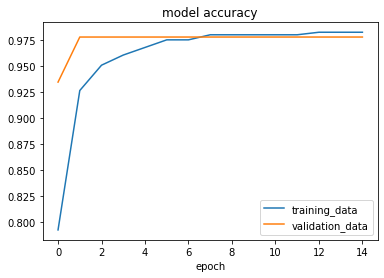

In [ ]:
#visulaising accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.legend(['training_data','validation_data'],loc='lower right')

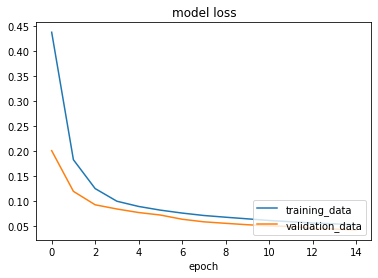

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['training_data','validation_data'],loc='lower right')

In [ ]:
#test 
loss,accuracy=model.evaluate(x_test_std,Y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.0677 - accuracy: 0.9737


In [ ]:
print(x_test_std.shape)
x_test_std[0]


(114, 30)


array([-0.04107965, -0.62016827, -0.09923188, -0.13841899, -2.04141668,
       -0.97434862, -0.8394778 , -0.92156025,  0.02809723, -1.05937676,
       -0.88398176, -1.15736717, -0.71925994, -0.55890916, -1.26779903,
       -0.68496834, -0.69638158, -1.08947373, -0.93014093, -0.65322702,
       -0.21314591, -0.6201684 , -0.16042109, -0.26856306, -1.70694429,
       -0.31938497, -0.61689288, -0.77328572, -0.33970827, -0.3753601 ])

In [ ]:
y_pred=model.predict(x_test_std)

In [ ]:
model.predict()


TypeError: ignored

In [ ]:
y_pred  

array([[9.52102244e-02, 9.89186227e-01],
       [5.12481257e-02, 9.56471384e-01],
       [2.89005995e-01, 8.04953575e-01],
       [6.25983834e-01, 2.28142351e-01],
       [9.46094751e-01, 5.66077530e-02],
       [2.90246997e-02, 9.80140150e-01],
       [6.53752983e-01, 7.00268149e-02],
       [3.45903896e-02, 9.86599803e-01],
       [9.99954581e-01, 1.19070915e-04],
       [9.98512924e-01, 5.18974755e-03],
       [3.37140918e-01, 6.20222211e-01],
       [9.79954422e-01, 1.86218112e-03],
       [1.43632337e-01, 9.86024559e-01],
       [4.83552888e-02, 9.89973426e-01],
       [9.78984535e-01, 3.98928905e-03],
       [9.08405893e-03, 9.96845424e-01],
       [7.41809666e-01, 2.51733571e-01],
       [6.82085007e-02, 8.26789916e-01],
       [9.61962913e-04, 9.99992967e-01],
       [4.22526374e-02, 9.89983320e-01],
       [1.28815696e-01, 9.71099257e-01],
       [6.86715484e-01, 9.17389333e-01],
       [1.38005748e-01, 9.84745860e-01],
       [3.64378244e-02, 9.86108005e-01],
       [7.400130

Gives me the probability value

0.09521022 ==> Probability of obtaining 0

0.9891862 ==> Probability of obtaining 1

In [ ]:
#converting prediction proba to class labels.
#argmax function gives position of max value in lsit
y_pred_labels=[np.argmax(i) for i in y_pred]
y_pred_labels

[1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0]

In [86]:
#Building predictive system
input_data=(15.85,23.95,103.7,782.7,0.08401,0.1002,0.09938,0.05364,0.1847,0.05338,0.4033,1.078,2.903,36.58,0.009769,0.03126,0.05051,0.01992,0.02981,0.003002,16.84,27.66,112,876.5,0.1131,0.1924,0.2322,0.1119,0.2809,0.06287
)
input_data_nparray=np.asarray(input_data)
#reshape data
input_data_reshaped=input_data_nparray.reshape(1,-1)
#standardize data
input_data_std=scaler.transform(input_data_reshaped)
prediction=model.predict(input_data_std)
print(prediction)
prediction_label=[np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0]==0):
  print('Tumor is mailignant')
else:
  print('Tumor is Benign')


[[0.66625124 0.29492396]]
[0]
Tumor is mailignant


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
